In [1]:
require('tidyverse')

Loading required package: tidyverse

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.0     v purrr   0.3.3
v tibble  3.0.1     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
nmr_file = 'nmr_cmp.csv'
nmr_real = read.csv(nmr_file)
head(nmr_real)

,Metabolite,Param,mean,sd,X2.5.,X50.,X97.5.,Rhat,Z.x,P_GT_LT_0,SIG_BAYES,Estimate,StdErr,Z.y,P.value,P.Bon,P.BH,SIG_BH,SIG_BON,SIG.RAW
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
1,oacetylcarnitine,beta_x[20],0.6717432,0.1469516,0.3927007,0.6673229,0.9642254,0.9991854,4.571186,1,TRUE,0.7061123,0.1499184,4.709979,2.477425e-06,6.689048e-05,6.689048e-05,TRUE,TRUE,TRUE
2,tyrosine,beta_x[26],0.5841276,0.1385063,0.3186377,0.5812330,0.8667370,0.9995169,4.217335,1,TRUE,0.6176204,0.1424830,4.334696,1.459620e-05,3.940974e-04,1.663743e-04,TRUE,TRUE,TRUE
3,betaine,beta_x[5],0.5982423,0.1462437,0.3239850,0.5944203,0.9011620,0.9996255,4.090722,1,TRUE,0.6337244,0.1502429,4.217999,2.464804e-05,6.654972e-04,1.663743e-04,TRUE,TRUE,TRUE
4,propyleneglycol,beta_x[24],0.5828457,0.1430009,0.3139879,0.5783890,0.8780225,0.9992295,4.075819,1,TRUE,0.6580247,0.1558877,4.221145,2.430643e-05,6.562735e-04,1.663743e-04,TRUE,TRUE,TRUE
5,glycine,beta_x[13],0.5143159,0.1381882,0.2389536,0.5118453,0.7909574,0.9993084,3.721850,1,TRUE,0.5754833,0.1469295,3.916729,8.975845e-05,2.423478e-03,4.846956e-04,TRUE,TRUE,TRUE
6,lysine,beta_x[18],0.5040743,0.1354654,0.2456936,0.5033788,0.7759191,0.9991043,3.721056,1,TRUE,0.5471660,0.1433105,3.818045,1.345133e-04,3.631860e-03,6.053100e-04,TRUE,TRUE,TRUE


In [3]:
nmr_real = nmr_real %>% mutate(Fmin=Estimate-StdErr, Fmax=Estimate+StdErr, 
                               Bmin = mean-sd, Bmax = mean+sd)
head(nmr_real)

,Metabolite,Param,mean,sd,X2.5.,X50.,X97.5.,Rhat,Z.x,P_GT_LT_0,...,P.value,P.Bon,P.BH,SIG_BH,SIG_BON,SIG.RAW,Fmin,Fmax,Bmin,Bmax
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,oacetylcarnitine,beta_x[20],0.6717432,0.1469516,0.3927007,0.6673229,0.9642254,0.9991854,4.571186,1,...,2.477425e-06,6.689048e-05,6.689048e-05,TRUE,TRUE,TRUE,0.5561939,0.8560306,0.5247916,0.8186949
2,tyrosine,beta_x[26],0.5841276,0.1385063,0.3186377,0.5812330,0.8667370,0.9995169,4.217335,1,...,1.459620e-05,3.940974e-04,1.663743e-04,TRUE,TRUE,TRUE,0.4751374,0.7601034,0.4456212,0.7226339
3,betaine,beta_x[5],0.5982423,0.1462437,0.3239850,0.5944203,0.9011620,0.9996255,4.090722,1,...,2.464804e-05,6.654972e-04,1.663743e-04,TRUE,TRUE,TRUE,0.4834815,0.7839673,0.4519986,0.7444860
4,propyleneglycol,beta_x[24],0.5828457,0.1430009,0.3139879,0.5783890,0.8780225,0.9992295,4.075819,1,...,2.430643e-05,6.562735e-04,1.663743e-04,TRUE,TRUE,TRUE,0.5021369,0.8139124,0.4398448,0.7258466
5,glycine,beta_x[13],0.5143159,0.1381882,0.2389536,0.5118453,0.7909574,0.9993084,3.721850,1,...,8.975845e-05,2.423478e-03,4.846956e-04,TRUE,TRUE,TRUE,0.4285537,0.7224128,0.3761277,0.6525042
6,lysine,beta_x[18],0.5040743,0.1354654,0.2456936,0.5033788,0.7759191,0.9991043,3.721056,1,...,1.345133e-04,3.631860e-03,6.053100e-04,TRUE,TRUE,TRUE,0.4038555,0.6904766,0.3686090,0.6395397


In [4]:
# p = ggplot(nmr_real,
#        aes(x=Estimate, y=mean, color = SIG_BAYES)) + geom_point() + theme_classic() + 
# geom_abline(slope=1,intercept=0) + 
# labs (y='Bayes Estimate', x='Standard Estimate') + xlim(-0.1,1) + ylim(-0.1,1) +
# scale_color_manual(labels = c("Non-Significant", "Significant"),
#                           values = c("#0072B2", "#D55E00")) +
#   theme(legend.position = c(0.75, 0.35),
#         legend.text = element_text(size=12),
#         legend.title = element_blank())
       



In [5]:
p = ggplot(nmr_real %>% filter(SIG_BAYES==TRUE),
       aes(x=Estimate, y=mean, color = SIG_BAYES)) + geom_point() + theme_classic() + 
geom_abline(slope=1,intercept=0) + 
labs (y='Bayesian Estimate', x='Standard Estimate') + xlim(0.2,0.80) + ylim(0.2,0.80) +
scale_color_manual(labels = c("Significant by Bayesian Methods"),
                          values = c("#0072B2")) +
  theme(legend.position = c(0.65, 0.15),
        legend.text = element_text(size=12),
        legend.title = element_blank())
       

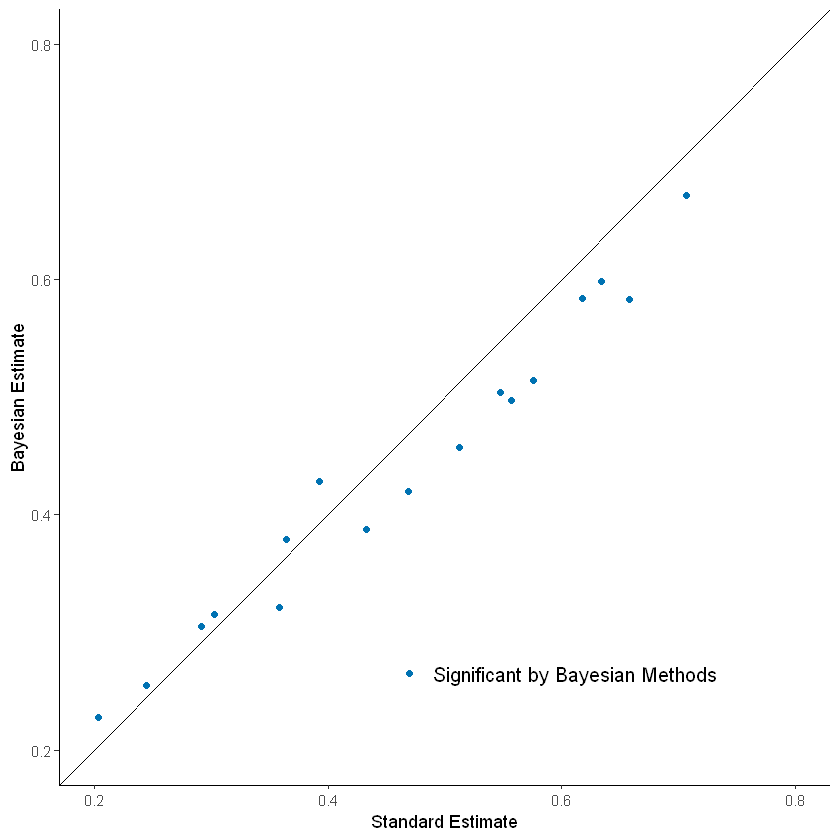

In [6]:
p 

In [7]:
ggsave("NEW_figure_S3.tiff", plot = last_plot(),
       width = 5, height = 5, units = "in",
       dpi = 300)

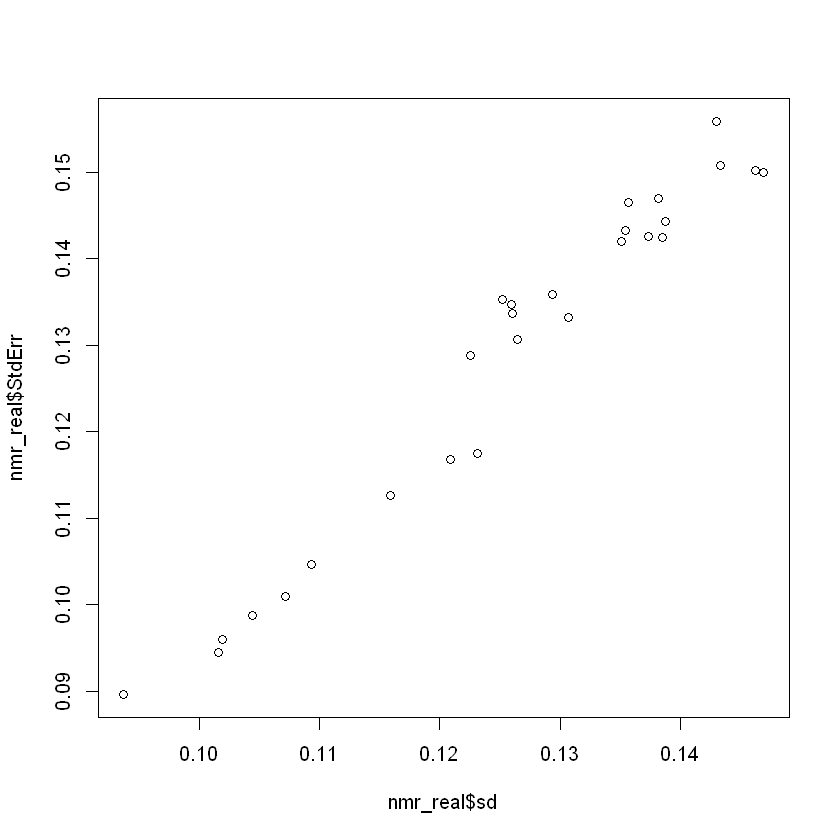

In [83]:
plot(nmr_real$sd, nmr_real$StdErr)

In [11]:
nmr_real %>% filter(SIG_BAYES=='TRUE') %>%
    mutate(mean_error = abs(Estimate - mean)/mean) %>% pull

[1] 0.05116398 0.05733823 0.05931058 0.12898602 0.11892950 0.08548678
 [7] 0.08388620 0.03982236 0.12118204 0.12010408 0.11606769 0.11598617
[13] 0.04579436 0.04104939 0.03927571 0.11660063 0.10708940

In [29]:
gc_file = 'gc_cmp.csv'
gc_real = read.csv(gc_file)
head(gc_real)

,Metabolite,Param,mean,sd,X2.5.,X50.,X97.5.,Rhat,Z.x,P_GT_LT_0,SIG_BAYES,Estimate,StdErr,Z.y,P.value,P.Bon,P.BH,SIG_BH,SIG_BON,SIG.RAW
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>
1,X3,beta_x[2],0.2716910,0.20585602,-0.02157329,0.23822725,0.77553366,1.005620,1.319811,0.96000,FALSE,0.9147064,0.27552036,3.319923,0.0009004221,0.03691731,0.03691731,TRUE,TRUE,TRUE
2,X12,beta_x[10],-0.1540768,0.11807476,-0.42087609,-0.14426860,0.03862213,1.003211,-1.304909,0.92550,FALSE,-0.3255644,0.13999074,-2.325614,0.0200391498,0.82160514,0.21965824,FALSE,FALSE,TRUE
3,X70,beta_x[39],-0.1852725,0.14995730,-0.52661489,-0.16556217,0.04549855,1.006516,-1.235501,0.91925,FALSE,-0.4920620,0.18841929,-2.611527,0.0090138978,0.36956981,0.18478491,FALSE,FALSE,TRUE
4,X6,beta_x[5],-0.1428744,0.12084181,-0.41920387,-0.12933452,0.05659793,1.002161,-1.182326,0.90225,FALSE,-0.3776557,0.16417524,-2.300320,0.0214300722,0.87863296,0.21965824,FALSE,FALSE,TRUE
5,X8,beta_x[7],-0.1276216,0.11023146,-0.37071775,-0.11764023,0.05400695,1.000995,-1.157761,0.88950,FALSE,-0.2897639,0.15910419,-1.821221,0.0685732341,1.00000000,0.40164323,FALSE,FALSE,FALSE
6,X48,beta_x[30],-0.0884714,0.08405412,-0.26409491,-0.08438648,0.06381241,1.001296,-1.052553,0.85375,FALSE,-0.1324167,0.09707177,-1.364112,0.1725323802,1.00000000,0.60464692,FALSE,FALSE,FALSE


In [30]:
q = ggplot(gc_real,aes(x=Estimate, y=mean, color=SIG_BAYES)) + geom_point() + theme_classic() + 
geom_abline(slope=1,intercept=0) + 
labs (y='Bayes Estimate', x='Standard Estimate') +
scale_color_manual(labels = c("Non-Significant", "Significant"),
                          values = c("#0072B2", "#D55E00")) +
  theme(legend.position = c(0.75, 0.35),
        legend.text = element_text(size=12),
        legend.title = element_blank()) +  xlim(-0.5,1) + ylim(-0.5, 1) 


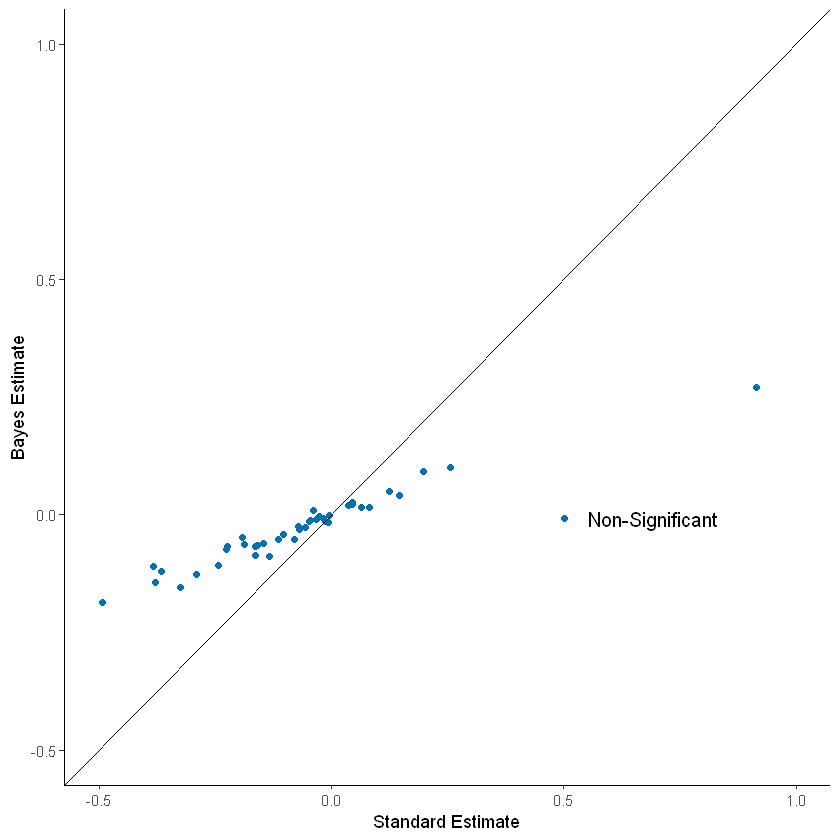

In [31]:
q 

In [108]:
min(gc_real$Estimate)

[1] -0.492062

Loading required package: magrittr


Attaching package: 'magrittr'


The following object is masked from 'package:rstan':

    extract


The following object is masked from 'package:purrr':

    set_names


The following object is masked from 'package:tidyr':

    extract




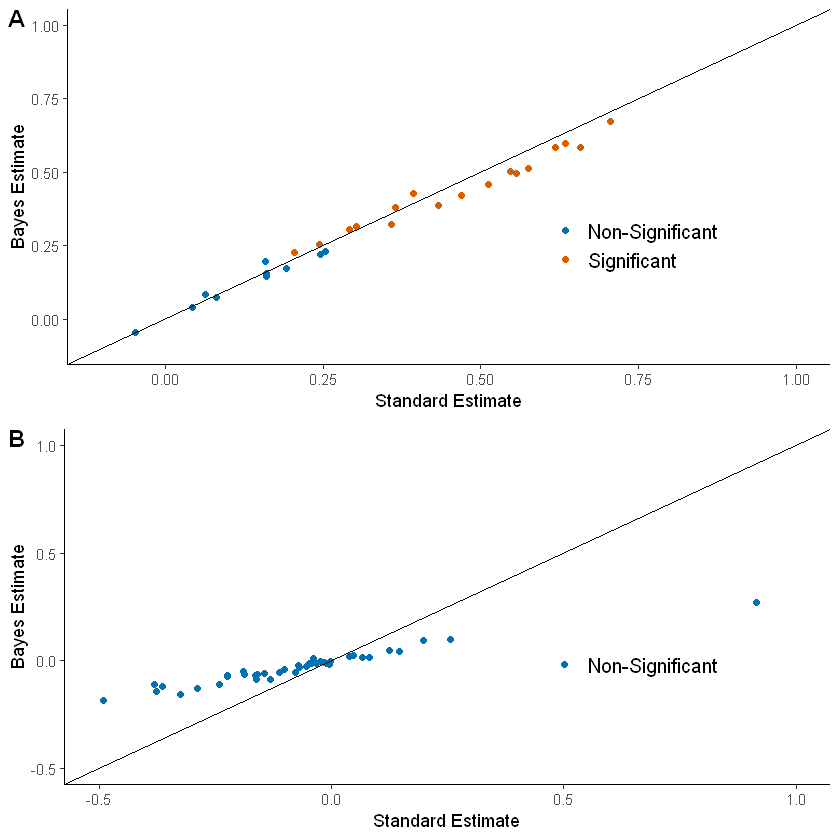

In [100]:
library('ggpubr')
fig_s2 = ggarrange(p, q, labels = c("A", "B"),
          ncol = 1, nrow = 2)
fig_s2

In [101]:
ggsave("figure_S2.tiff", plot = last_plot(),scale = 0.85, 
       width = 5, height = 7, units = c("in", "cm", "mm"),
       dpi = 300)

In [18]:
#range(nmr_real$Estimate)
#range(nmr_real$mean)
x=lm(mean ~ Estimate, data = nmr_real)
summary(x)


Call:
lm(formula = mean ~ Estimate, data = nmr_real)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.02631 -0.01872 -0.01533  0.01853  0.05812 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.017280   0.008879   1.946   0.0629 .  
Estimate    0.899478   0.022327  40.286   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02397 on 25 degrees of freedom
Multiple R-squared:  0.9848,	Adjusted R-squared:  0.9842 
F-statistic:  1623 on 1 and 25 DF,  p-value: < 2.2e-16


In [104]:
#library('rstan')
#library('rstanarm')
m = stan_glm( mean ~ Estimate , prior=NULL, prior_intercept=NULL, 
             data=nmr_real, family = 'gaussian', iter = 10000 )
m$stanfit


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1: Iteration: 2000 / 10000 [ 20%]  (Warmup)
Chain 1: Iteration: 3000 / 10000 [ 30%]  (Warmup)
Chain 1: Iteration: 4000 / 10000 [ 40%]  (Warmup)
Chain 1: Iteration: 5000 / 10000 [ 50%]  (Warmup)
Chain 1: Iteration: 5001 / 10000 [ 50%]  (Sampling)
Chain 1: Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1: Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1: Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1: Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.221 seconds (Warm-up)
Chain 1:                0.22 seconds (Sampling)
Chain 1:                0

Inference for Stan model: continuous.
4 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=20000.

               mean se_mean   sd  2.5%   25%   50%   75% 97.5% n_eff Rhat
(Intercept)    0.02    0.00 0.01  0.00  0.01  0.02  0.02  0.04 14789    1
Estimate       0.90    0.00 0.02  0.85  0.88  0.90  0.92  0.95 15125    1
sigma          0.03    0.00 0.00  0.02  0.02  0.02  0.03  0.03 14287    1
mean_PPD       0.32    0.00 0.01  0.31  0.32  0.32  0.33  0.34 16875    1
log-posterior 59.64    0.02 1.31 56.16 59.05 59.99 60.60 61.12  7125    1

Samples were drawn using NUTS(diag_e) at Tue Apr 28 10:53:31 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

Warning message:
"`expand_scale()` is deprecated; use `expansion()` instead."


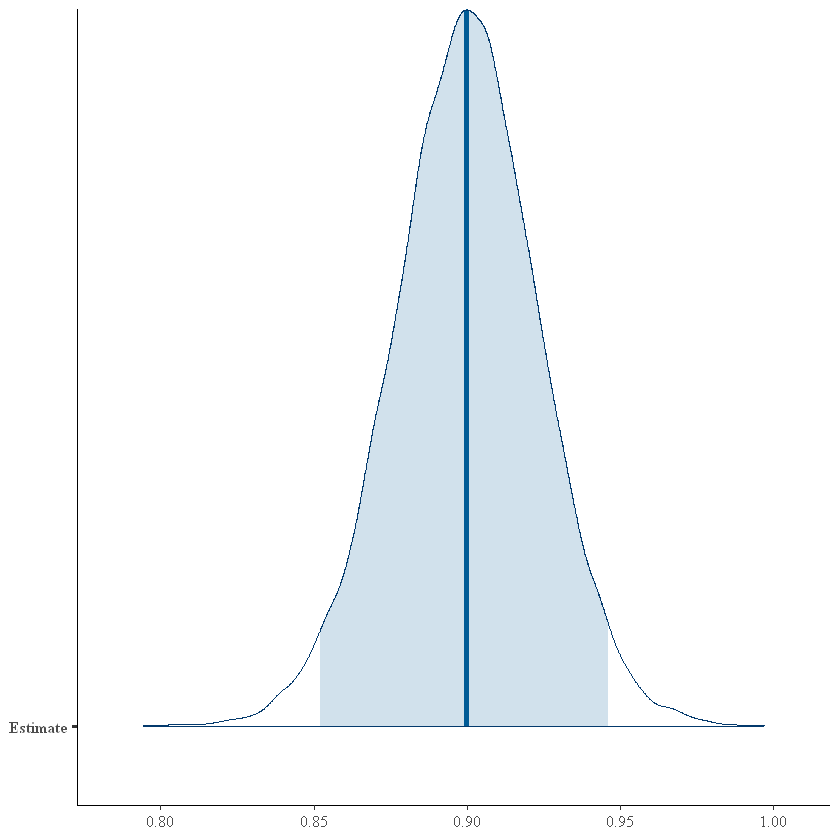

In [106]:
mcmc_areas(m$stanfit, pars=c( 'Estimate'), prob_outer = 0.9999, prob=0.95)


In [107]:
post = rstan::extract(m$stanfit)

In [109]:
 mean(post$beta[, 1] < 1)

[1] 0.99995

In [114]:
summary(post$beta[, 1])
posterior_interval(post$beta, prob = 0.95)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7919  0.8843  0.9000  0.8998  0.9154  1.0024 

2.5%,97.5%
0.8520727,0.9462881


In [116]:
x1=lm(mean ~ Estimate, data = gc_real)
summary(x1)


Call:
lm(formula = mean ~ Estimate, data = gc_real)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.037787 -0.007960 -0.000596  0.010509  0.030460 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.005499   0.002791  -1.971   0.0559 .  
Estimate     0.341230   0.011917  28.634   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01705 on 39 degrees of freedom
Multiple R-squared:  0.9546,	Adjusted R-squared:  0.9534 
F-statistic: 819.9 on 1 and 39 DF,  p-value: < 2.2e-16


In [115]:
m1 = stan_glm( mean ~ Estimate , prior=NULL, prior_intercept=NULL, 
             data=gc_real, family = 'gaussian', iter = 10000 )
m1$stanfit


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1: Iteration: 2000 / 10000 [ 20%]  (Warmup)
Chain 1: Iteration: 3000 / 10000 [ 30%]  (Warmup)
Chain 1: Iteration: 4000 / 10000 [ 40%]  (Warmup)
Chain 1: Iteration: 5000 / 10000 [ 50%]  (Warmup)
Chain 1: Iteration: 5001 / 10000 [ 50%]  (Sampling)
Chain 1: Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1: Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1: Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1: Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.211 seconds (Warm-up)
Chain 1:                0.196 seconds (Sampling)
Chain 1:                

Inference for Stan model: continuous.
4 chains, each with iter=10000; warmup=5000; thin=1; 
post-warmup draws per chain=5000, total post-warmup draws=20000.

                mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
(Intercept)    -0.01    0.00 0.00  -0.01  -0.01  -0.01   0.00   0.00 18843    1
Estimate        0.34    0.00 0.01   0.32   0.33   0.34   0.35   0.37 17936    1
sigma           0.02    0.00 0.00   0.01   0.02   0.02   0.02   0.02 15246    1
mean_PPD       -0.03    0.00 0.00  -0.04  -0.03  -0.03  -0.03  -0.02 18920    1
log-posterior 106.46    0.01 1.26 103.19 105.88 106.78 107.39 107.90  8503    1

Samples were drawn using NUTS(diag_e) at Tue Apr 28 11:09:40 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

In [119]:
post1 = rstan::extract(m1$stanfit)
mean(post1$beta[, 1] < 1)
summary(post1$beta[, 1])
posterior_interval(post1$beta, prob = 0.95)

[1] 1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2922  0.3330  0.3412  0.3411  0.3492  0.3944 

2.5%,97.5%
0.3164538,0.3652977
